In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [68]:
# Load your dataset
df = pd.read_csv('/content/Salaries.csv')


In [69]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [71]:
df.shape

(148654, 13)

In [72]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [73]:
df.mean()

<ipython-input-73-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Id                  74327.500000
BasePay             66325.448840
OvertimePay          5066.059886
OtherPay             3648.767297
Benefits            25007.893151
TotalPay            74768.321972
TotalPayBenefits    93692.554811
Year                 2012.522643
Notes                        NaN
Status                       NaN
dtype: float64

In [74]:
df.median()

<ipython-input-74-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Id                  74327.50
BasePay             65007.45
OvertimePay             0.00
OtherPay              811.27
Benefits            28628.62
TotalPay            71426.61
TotalPayBenefits    92404.09
Year                 2013.00
Notes                    NaN
Status                   NaN
dtype: float64

In [75]:
df.mode()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,0.0,7959.18,2014.0,NaN,San Francisco,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148650,148651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148651,148652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148652,148653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.min()

Id                                 1
EmployeeName        A BERNARD FATOOH
JobTitle               ACCOUNT CLERK
BasePay                      -166.01
OvertimePay                    -0.01
OtherPay                    -7058.59
Benefits                      -33.89
TotalPay                     -618.13
TotalPayBenefits             -618.13
Year                            2011
Notes                            NaN
Agency                 San Francisco
Status                           NaN
dtype: object

In [77]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649    

In [78]:
df.std()

<ipython-input-78-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Id                  42912.857795
BasePay             42764.635495
OvertimePay         11454.380559
OtherPay             8056.601866
Benefits            15402.215858
TotalPay            50517.005274
TotalPayBenefits    62793.533483
Year                    1.117538
Notes                        NaN
Status                       NaN
dtype: float64

In [79]:
df.dropna(inplace=True)

In [80]:
df.duplicated().sum()

0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                0 non-null      int64  
 1   EmployeeName      0 non-null      object 
 2   JobTitle          0 non-null      object 
 3   BasePay           0 non-null      float64
 4   OvertimePay       0 non-null      float64
 5   OtherPay          0 non-null      float64
 6   Benefits          0 non-null      float64
 7   TotalPay          0 non-null      float64
 8   TotalPayBenefits  0 non-null      float64
 9   Year              0 non-null      int64  
 10  Notes             0 non-null      float64
 11  Agency            0 non-null      object 
 12  Status            0 non-null      float64
dtypes: float64(8), int64(2), object(3)
memory usage: 0.0+ bytes


In [82]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.isnull().sum()

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Notes               0.0
Agency              0.0
Status              0.0
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1316: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


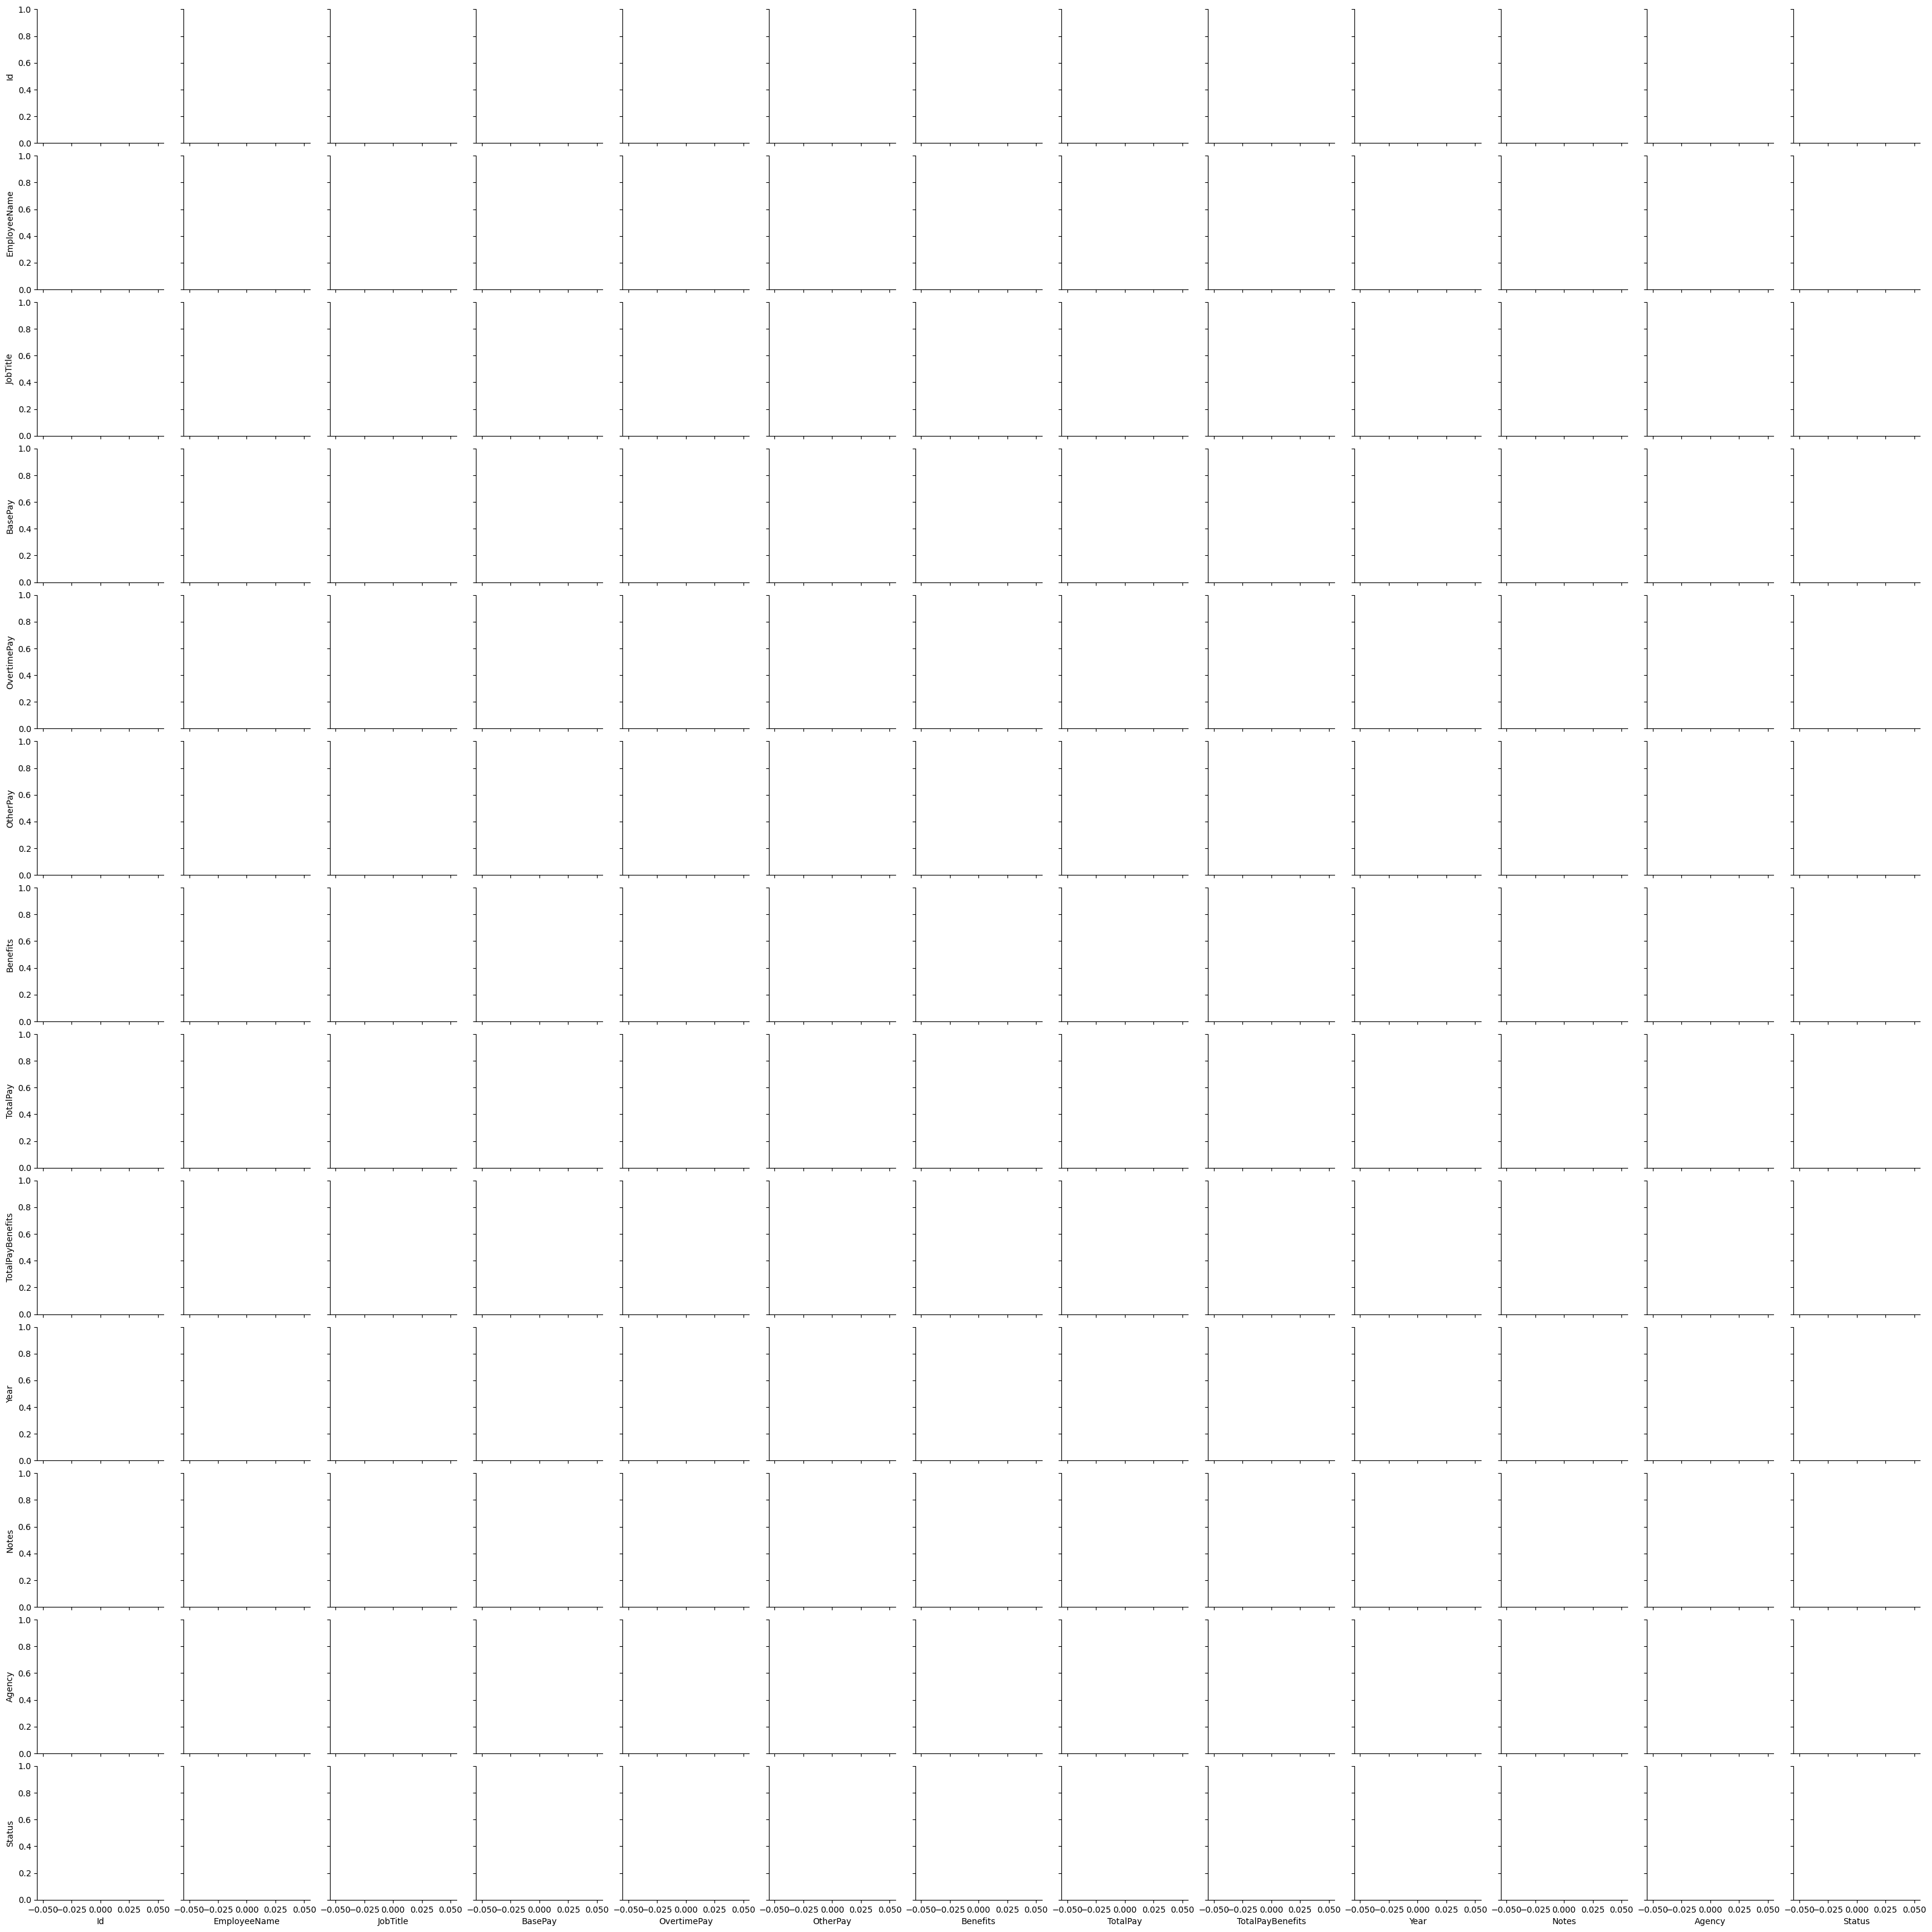

In [84]:
sns.pairplot(df)

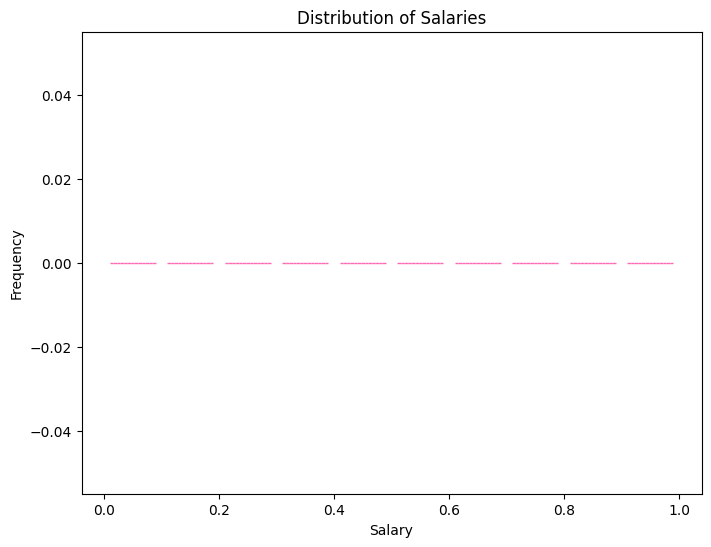

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(df, bins=10, edgecolor='hotpink')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

In [86]:
print(df.corr())

                  Id  BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
Id               NaN      NaN          NaN       NaN       NaN       NaN   
BasePay          NaN      NaN          NaN       NaN       NaN       NaN   
OvertimePay      NaN      NaN          NaN       NaN       NaN       NaN   
OtherPay         NaN      NaN          NaN       NaN       NaN       NaN   
Benefits         NaN      NaN          NaN       NaN       NaN       NaN   
TotalPay         NaN      NaN          NaN       NaN       NaN       NaN   
TotalPayBenefits NaN      NaN          NaN       NaN       NaN       NaN   
Year             NaN      NaN          NaN       NaN       NaN       NaN   
Notes            NaN      NaN          NaN       NaN       NaN       NaN   
Status           NaN      NaN          NaN       NaN       NaN       NaN   

                  TotalPayBenefits  Year  Notes  Status  
Id                             NaN   NaN    NaN     NaN  
BasePay                        NaN   NaN    NaN

<ipython-input-86-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


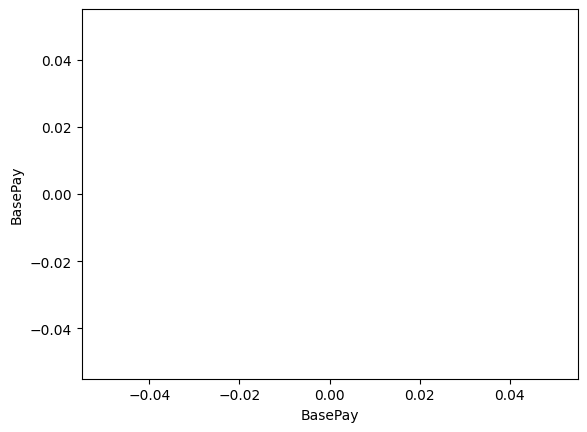

In [88]:
plt.scatter(df.BasePay, df.Year)
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()

First i imported all the libraries , read the csv file , so to know the if there any dublicated and how many column and rows , i checked if there any missing value so we can do dropna to get all of them null so we calculated maximum and minimum , then i made the histogram to show the graph
